![](TheSparksFoundationLogo.png)

## GRIP @ The Sparks Foundation

## Task3: Exploratory Data Analysis - Terrorism

### Author: Renuka Prasad Patwari

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Importing the data

In [2]:
#create dataframe from csv file
cwd = os.getcwd()

df = pd.read_csv(cwd+"/globalterrorismdb_0718dist.csv", index_col=0, encoding="ISO-8859-1",low_memory=False)

In [3]:
df.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Understanding the data

In [4]:
df.shape

(181691, 134)

It is evident that the dataset is large as it contains **181691 rows and 134 columns(excluding the id column)**

In [5]:
df.columns

Index(['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution',
       'country', 'country_txt', 'region', 'region_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=134)

### Renaming and selecting important columns

In [6]:
df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day','country':'country_no', 'country_txt':'country', 'region':'region_no', 'region_txt':'region', 
                   'provstate':'state','attacktype1_txt':'attack_type', 'targtype1_txt':'target_type', 'targsubtype1_txt':'target_subtype',
                    'target1':'target', 'natlty1_txt':'target_nationality', 'gname':'gangname', 'weaptype1_txt':'weapon_type',
                    'nkill':'killed', 'nwound':'wounded','propextent_txt':'property_extent','propvalue':'property_value'}, inplace=True)

#### Creating a new dataframe for all the important columns

In [7]:
terror = df[['year', 'month', 'day','country', 'region', 'state', 'city', 'latitude', 'longitude', 'attack_type', 
             'target_type', 'target_subtype', 'target', 'target_nationality', 'gangname', 'motive', 'weapon_type', 'killed', 
             'wounded', 'property_value', 'summary']]
terror.head()

,year,month,day,country,region,state,city,latitude,longitude,attack_type,...,target_subtype,target,target_nationality,gangname,motive,weapon_type,killed,wounded,property_value,summary
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,...,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,NaN
197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,NaN
197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,...,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,NaN
197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,...,Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,NaN
197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,...,Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN


In [8]:
terror.shape

(181691, 21)

New dataframe contains **181691 rows and 21 columns(excluding the id column)**

In [9]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 197000000001 to 201712310032
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                181691 non-null  int64  
 1   month               181691 non-null  int64  
 2   day                 181691 non-null  int64  
 3   country             181691 non-null  object 
 4   region              181691 non-null  object 
 5   state               181270 non-null  object 
 6   city                181257 non-null  object 
 7   latitude            177135 non-null  float64
 8   longitude           177134 non-null  float64
 9   attack_type         181691 non-null  object 
 10  target_type         181691 non-null  object 
 11  target_subtype      171318 non-null  object 
 12  target              181055 non-null  object 
 13  target_nationality  180132 non-null  object 
 14  gangname            181691 non-null  object 
 15  motive           

### Checking the null values

In [10]:
terror.isnull().sum()

year                       0
month                      0
day                        0
country                    0
region                     0
state                    421
city                     434
latitude                4556
longitude               4557
attack_type                0
target_type                0
target_subtype         10373
target                   636
target_nationality      1559
gangname                   0
motive                131130
weapon_type                0
killed                 10313
wounded                16311
property_value        142702
summary                66129
dtype: int64

#### We need to replace the null values present in the dataset

Replacing the **categorical data with 'Unknown' or 'Others'**

In [11]:
terror['city'] = terror['city'].fillna('Unknown')
terror['state'] = terror['state'].fillna('Unknown')
terror['target_subtype'] = terror['target_subtype'].fillna('Others')
terror['target'] = terror['target'].fillna('Others')
terror['target_nationality'] = terror['target_nationality'].fillna('Others')
terror['motive'] = terror['motive'].fillna('Unknown')
terror['summary'] = terror['summary'].fillna('Unknown')

Replacing numeric data using **interpolate function**

In [12]:
terror['latitude']= terror['latitude'].interpolate(method='nearest')
terror['longitude']= terror['longitude'].interpolate(method='nearest')
terror['killed']= terror['killed'].interpolate(method='linear')
terror['wounded']= terror['wounded'].interpolate(method='linear')
terror['property_value']= terror['property_value'].interpolate(method='linear')
print('processed')

processed


In [13]:
terror.isnull().sum()

year                  0
month                 0
day                   0
country               0
region                0
state                 0
city                  0
latitude              0
longitude             0
attack_type           0
target_type           0
target_subtype        0
target                0
target_nationality    0
gangname              0
motive                0
weapon_type           0
killed                0
wounded               0
property_value        7
summary               0
dtype: int64

#### Sucessfully replaced the null values

In [14]:
#exporting the cleaned data as a new csv file

terror.to_csv(cwd+'/cleanedglobalterrorism.csv')
print("Sucessfully exported the cleaned data as cleanedglobalterrorism.csv file")

Sucessfully exported the cleaned data as cleanedglobalterrorism.csv file


## Data Visualizations

### Word Cloud

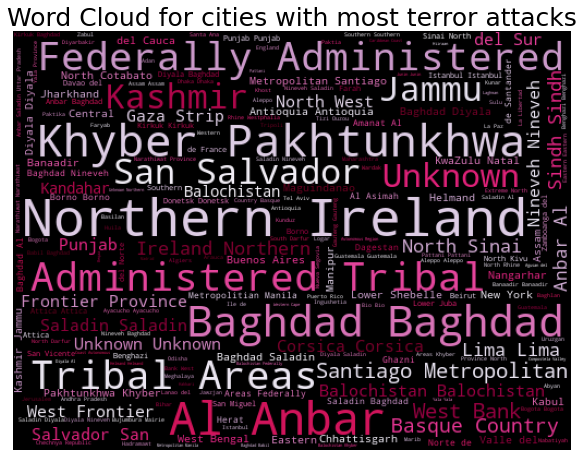

In [15]:
from wordcloud import WordCloud

cities = terror.state
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black', colormap="PuRd",
                     width = 512, height = 384).generate(' '.join(cities))
plt.axis('off')
plt.title('Word Cloud for cities with most terror attacks', fontsize=25)
plt.imshow(wordcloud)
plt.show()

### Terrorist attacks per year

Text(0.5, 1.0, 'Terrorist attack per year')

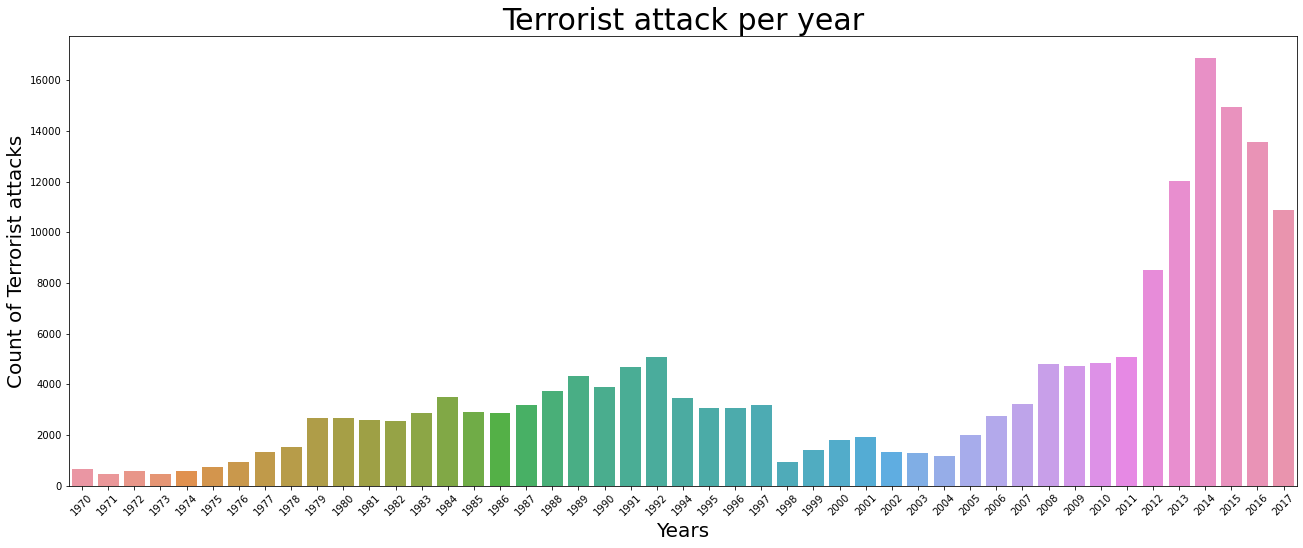

In [16]:
#attack_per_year = terror['year'].value_counts()

ax = plt.rcParams['figure.figsize'] = 22,8.27
ax = sns.countplot(x='year', data=terror)
ax.set_xlabel('Years', fontsize=20)
plt.xticks(rotation=45)
ax.set_ylabel('Count of Terrorist attacks', fontsize=20)
ax.set_title('Terrorist attack per year', fontsize=30)

### We can infer that:
#### 1] There was a sharp increase in attacks in 2012
#### 2] Maximum terrorist attacks took place in the year 2014
#### 3] There is gradual decrease in attacks from 2014

### Top 30 affected countries

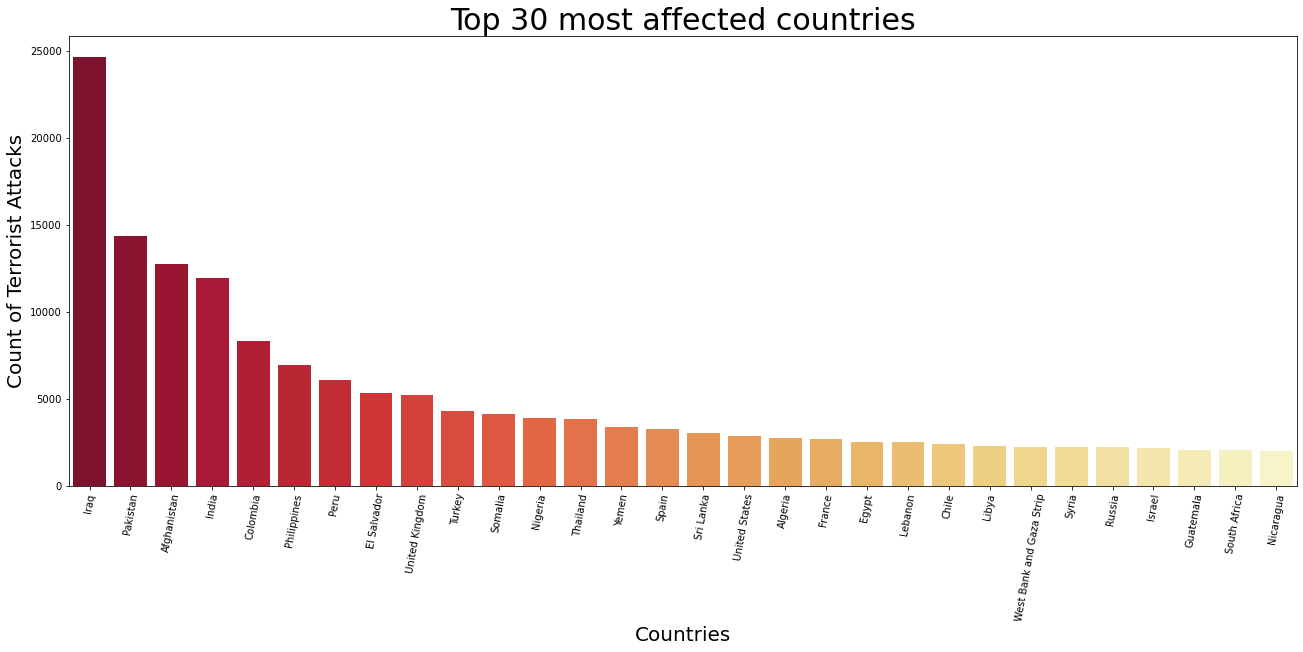

In [17]:
warnings.simplefilter(action="ignore", category=FutureWarning)
#top30_country = terror['country'].value_counts().index[:30]
ax = plt.rcParams['figure.figsize'] = 22, 8.27

ax = sns.barplot(terror['country'].value_counts()[:30].index,terror['country'].value_counts()[:30].values, palette='YlOrRd_r')
ax.set_xlabel('Countries', fontsize=20)
ax.set_ylabel('Count of Terrorist Attacks', fontsize=20)
plt.xticks(rotation=80)

ax.set_title('Top 30 most affected countries', fontsize=30)
plt.show()

### We can infer that:
#### Iraq is the most affected country followed respectively by Pakistan, Afganistan, India and Colombia

### Attack types

In [18]:
terror['attack_type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

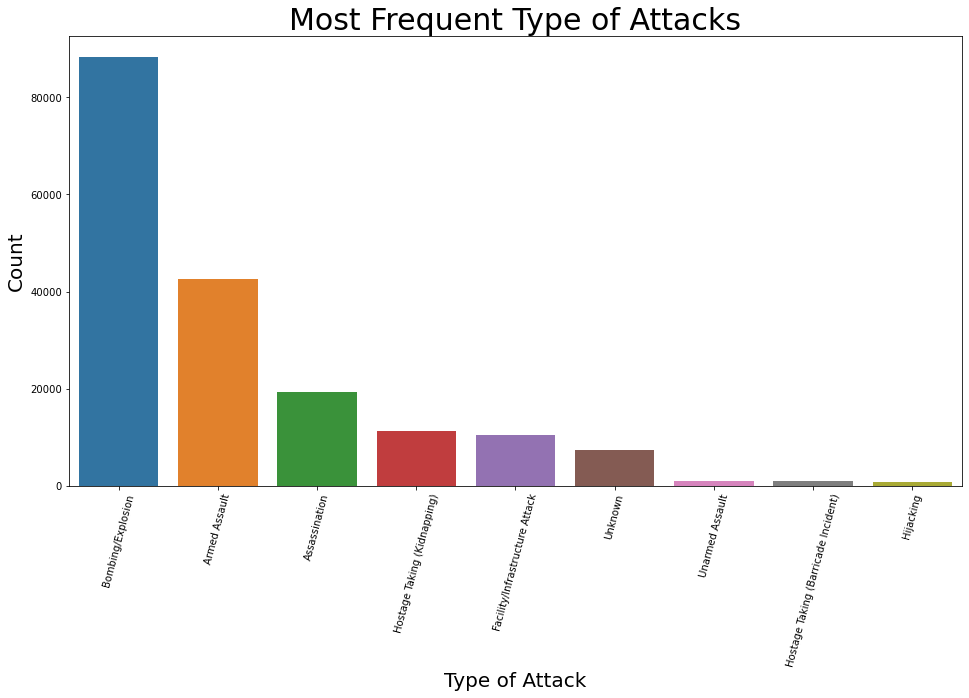

In [19]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attack_type',data=terror,order = terror['attack_type'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('Most Frequent Type of Attacks',fontsize=30);

### We can infer that
#### Bombing/Explosion is the most frequent Type of Attack followed by Armed Assault, Assassination, Hostage Taking and so on.

### Which terror group caused the most attacks

In [20]:
terror['gangname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gangname, Length: 3537, dtype: int64

Text(0.5, 1.0, 'Attacks carried out by terrorist groups')

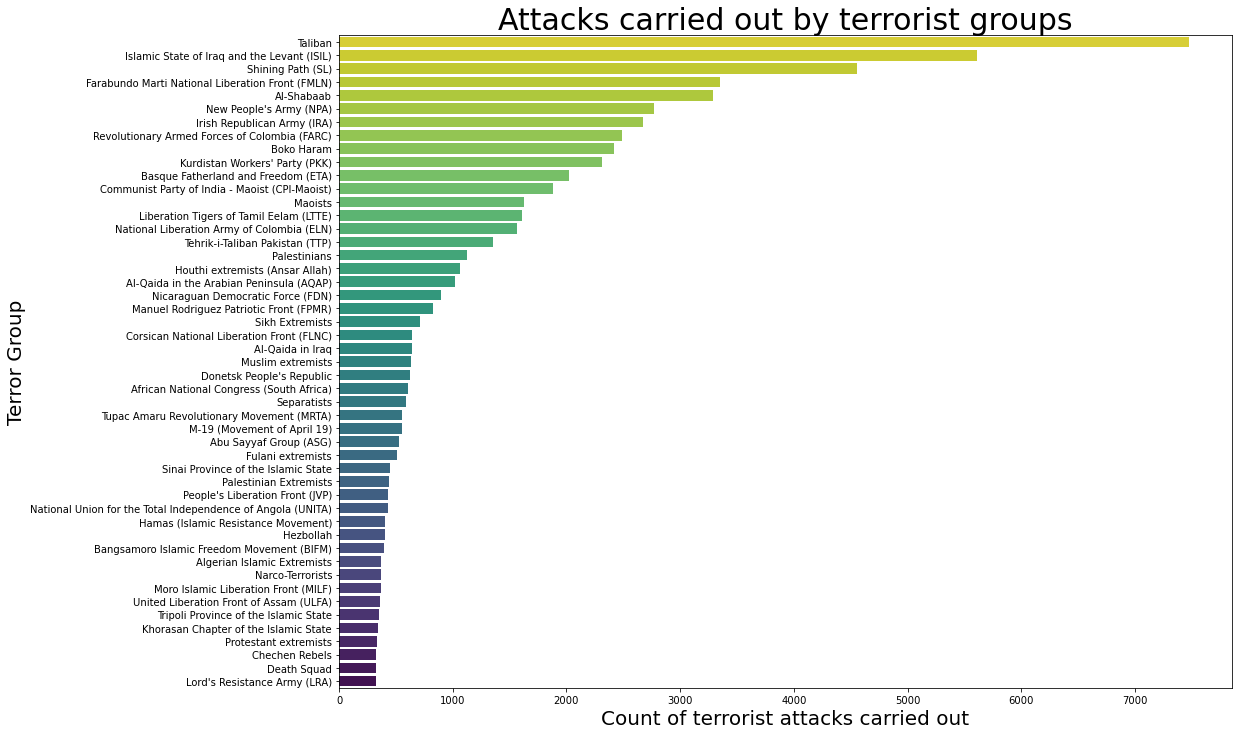

In [21]:
ax = plt.rcParams['figure.figsize'] = 16,12
ax=sns.countplot(y='gangname', data=terror, order=terror['gangname'].value_counts().index[1:50], palette='viridis_r')
ax.set_xlabel('Count of terrorist attacks carried out', fontsize=20)
ax.set_ylabel('Terror Group', fontsize=20)
ax.set_title('Attacks carried out by terrorist groups', fontsize=30)

### We can infer that
#### Taliban has carried out most number of Terrorist attacks.

### Changes in terror attacks after the declaration of "War on Terror"

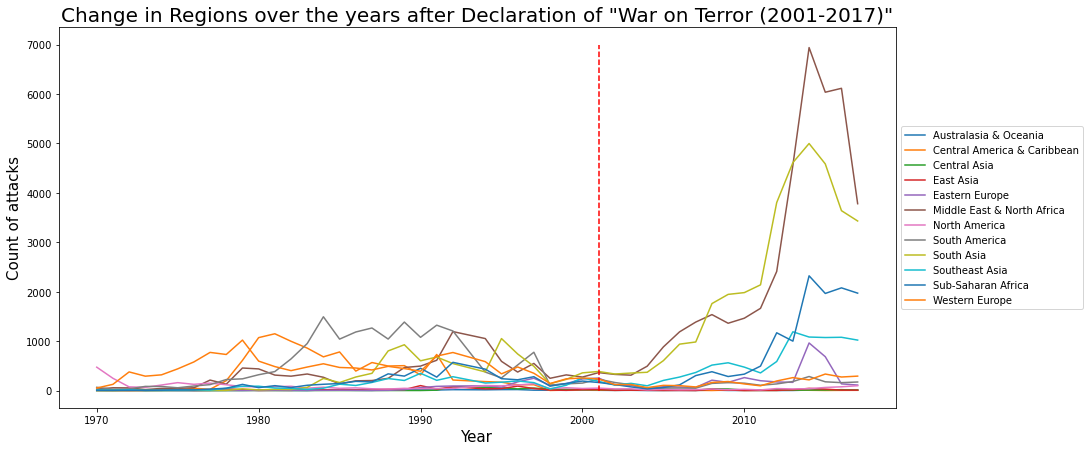

In [22]:
data_after = terror[terror['year']>=2001]

ax=plt.rcParams['figure.figsize'] = 15,7
ax=pd.crosstab(terror.year,terror.region).plot()
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Count of attacks',fontsize=15)
ax.set_title('Change in Regions over the years after Declaration of "War on Terror (2001-2017)"',fontsize=20);
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
ax.vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyle='--')

plt.show()

### We can infer that:
#### 1] The terrorism landscape before and after the War on Terror is vastly different.
#### 2] Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000.
#### 3] After 2001, the Middle East and South Asia have seen the rise in terrorism numbers

# Thankyou :)